📊 Desafio 45 — Previsão de Aprovação em Curso Online

📂 Dataset: dia_45_aprovacao_curso.csv
Este conjunto de dados representa alunos de um curso online com informações sobre participação, notas e resultado final.

🔍 Tarefas:

Qual é a média geral de presença dos alunos?

Quantos alunos foram aprovados e reprovados?

Existe alguma diferença significativa nas médias finais entre aprovados e reprovados?

Crie um gráfico de dispersão entre Presenca e Media_Final, colorido por Aprovado.

Treine um modelo de classificação (ex: DecisionTree ou LogisticRegression) para prever a variável Aprovado.

Avalie a acurácia do modelo e interprete quais variáveis mais influenciam o resultado.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("dia_45_aprovacao_curso.csv")
df.head()

,Aluno,Idade,Presenca,Atividades_Entregues,Nota_Provas,Nota_Projetos,Media_Final,Aprovado
0,Aluno_1,55,0.58,6,2.9,4.6,3.8,0
1,Aluno_2,39,0.59,19,8.0,6.2,7.1,0
2,Aluno_3,54,0.48,6,6.9,5.3,6.1,0
3,Aluno_4,16,0.82,15,4.9,5.1,5.0,0
4,Aluno_5,25,0.76,13,8.4,5.6,7.0,1


In [5]:
#Qual é a média geral de presença dos alunos?
mediaPresencaAlunos = df["Presenca"].mean().round(2)
print(mediaPresencaAlunos)

0.7


In [9]:
#Quantos alunos foram aprovados e reprovados?
aprovadosXreprovados = df["Aprovado"].value_counts()
print(aprovadosXreprovados)

Aprovado
0    242
1     58
Name: count, dtype: int64


In [14]:
#Existe alguma diferença significativa nas médias finais entre aprovados e reprovados?
mediasFinaisAprovados = df.groupby("Aprovado")["Media_Final"].mean()
print(mediasFinaisAprovados)

Aprovado
0    6.459504
1    7.486207
Name: Media_Final, dtype: float64


TtestResult(statistic=nan, pvalue=nan, df=nan)

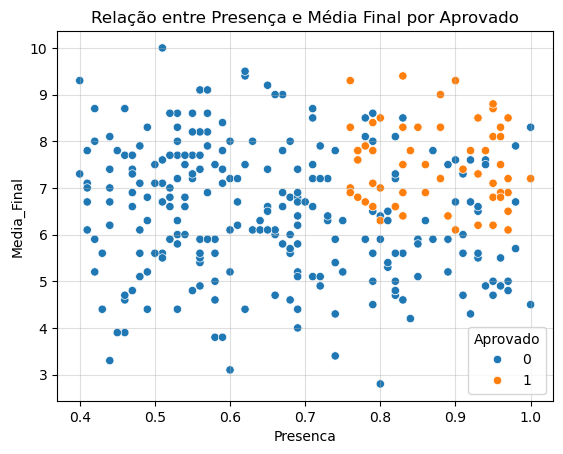

In [22]:
#Crie um gráfico de dispersão entre Presenca e Media_Final, colorido por Aprovado.
sns.scatterplot(data=df, x="Presenca", y="Media_Final", hue="Aprovado")
plt.title("Relação entre Presença e Média Final por Aprovado")
plt.grid(alpha=0.4)
plt.show()

In [24]:
#Treine um modelo de classificação (ex: DecisionTree ou LogisticRegression) para prever a variável Aprovado.
X = df.drop(["Aluno", "Aprovado"], axis=1)
y = df["Aprovado"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
#Avalie a acurácia do modelo e interprete quais variáveis mais influenciam o resultado.
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia}\n")

importancias = pd.DataFrame({"Variável": X.columns, "Importância": modelo.feature_importances_})
print(importancias.sort_values(by="Importância", ascending=False))


Acurácia: 1.0

               Variável  Importância
1              Presenca     0.367647
5           Media_Final     0.344828
2  Atividades_Entregues     0.287525
0                 Idade     0.000000
3           Nota_Provas     0.000000
4         Nota_Projetos     0.000000
